In [1]:
import numpy as np
from cgp.graph import Graph
from cgp.population import Population
from automata import CA_2D_model
from bw_images import *
from arg_parser import parse_args

In [2]:
from time import sleep, time
from ipycanvas import Canvas, hold_canvas
import dill

In [3]:
POPULATION = 32
APPLY_SOBEL_FILTER = False
VISION = 1
N_TOTAL_STEPS = 25
GENS = 30
SAVETO = None
RENDER = False
EXTRA_LAYERS = 1
GEN_CHAMPIONS = 4
FITNESS_GOAL = 0

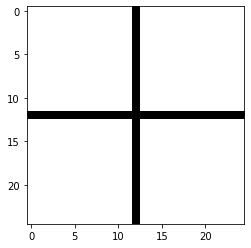

In [20]:
img_size = 25
# TARGET_IMG = column_img(img_size)
TARGET_IMG = plus_img(img_size)
# TARGET_IMG = degrade_img(img_size)
# TARGET_IMG = one_color_img(img_size, 0)
# TARGET_IMG = x_img(img_size)
# TARGET_IMG = diagonal_img(img_size)
# TARGET_IMG = load_emoji(command_line_args.img)
print_img(TARGET_IMG)

In [5]:
input_size = (VISION+2)**2
if APPLY_SOBEL_FILTER:
    input_size *= 3

In [6]:
seed = 2002
Graph.rng = np.random.RandomState(seed)

In [7]:
# addition = lambda x, y: x+y
# multiplication = lambda x, y: x*y
# subtraction = lambda x, y: x-y
# constant = lambda x: x
# protected_div = lambda x, y: 1 if y == 0 else x/y
# increment = lambda x: x+1
# invert = lambda x: -x

# Population.add_operation(arity=1, func=lambda x: 1, string="1")
# Population.add_operation(arity=1, func=lambda x: .5, string="0.5")
# Population.add_operation(arity=1, func=lambda x: .1, string="0.1")
# Population.add_operation(arity=1, func=constant, string="x")
# Population.add_operation(arity=1, func=increment, string="x+1")
# Population.add_operation(arity=1, func=invert, string="-x")
# Population.add_operation(arity=2, func=addition, string="x+y")
# Population.add_operation(arity=2, func=multiplication, string="x*y")
# Population.add_operation(arity=2, func=subtraction, string="x-y")
# Population.add_operation(arity=2, func=protected_div, string="*x/y")

In [8]:
BLACK = 255
WHITE = 0

def op_and(x, y):
    if y == BLACK and x == BLACK:
        return BLACK
    else:
        return WHITE

def op_or(x, y):
    if y == BLACK or x == BLACK:
        return BLACK
    else:
        return WHITE

def op_xor(x, y):
    if (y == BLACK or x == BLACK) and x != y:
        return BLACK
    else:
        return WHITE

def op_nand(x, y):
    if y == BLACK and x == BLACK:
        return WHITE
    else:
        return BLACK

def op_nor(x, y):
    if y == BLACK or x == BLACK:
        return WHITE
    else:
        return BLACK

def op_not(x):
    if x == WHITE:
        return BLACK
    else:
        return WHITE

def cte(x):
    return x


In [9]:
Population.add_operation(arity=2, func=op_and, string="and")
Population.add_operation(arity=2, func=op_or, string="or")
Population.add_operation(arity=2, func=op_xor, string="xor")
Population.add_operation(arity=2, func=op_nand, string="nand")
Population.add_operation(arity=2, func=op_nor, string="nor")
Population.add_operation(arity=1, func=op_not, string="not")
Population.add_operation(arity=1, func=cte, string="cte")

In [10]:
def eval_individual(individual: Graph, target_image, layers, render=False):
    shape = target_image.shape
    ca = CA_2D_model(shape[0], shape[1], individual.operate, layers)
    
    total_fitness = 0.0
    ca.reset_ca()

    for _ in range(N_TOTAL_STEPS):
        if render:
            test_images.print_img(ca.remove_pad())
            print(ca.fitness(target_image))
        update = ca.update()
        if not update: # the automata got stable
            break
    if ca.ca[0, :, :].sum() >= ca.len*ca.len*255:
        return 1000
    total_fitness += ca.fitness(target_image)/(255*255)

    fitness = (total_fitness) 
    return fitness

In [11]:
def fit_func(x):
    return eval_individual(x, TARGET_IMG, total_layers)

In [27]:
# test_images.print_img(TARGET_IMG)
total_layers = 1 
population = Population(
    population_size=POPULATION,
    n_in=total_layers*input_size,
    n_out=total_layers,
    n_row=8,
    n_col=4,
    levels_back=5,
    mutation_strategy="prob",
    fitness_func=fit_func,
    minimize_fitness=True,
    point_mut_qnt=10,
    prob_mut_chance=.2,
    mutate_active_only=False
)

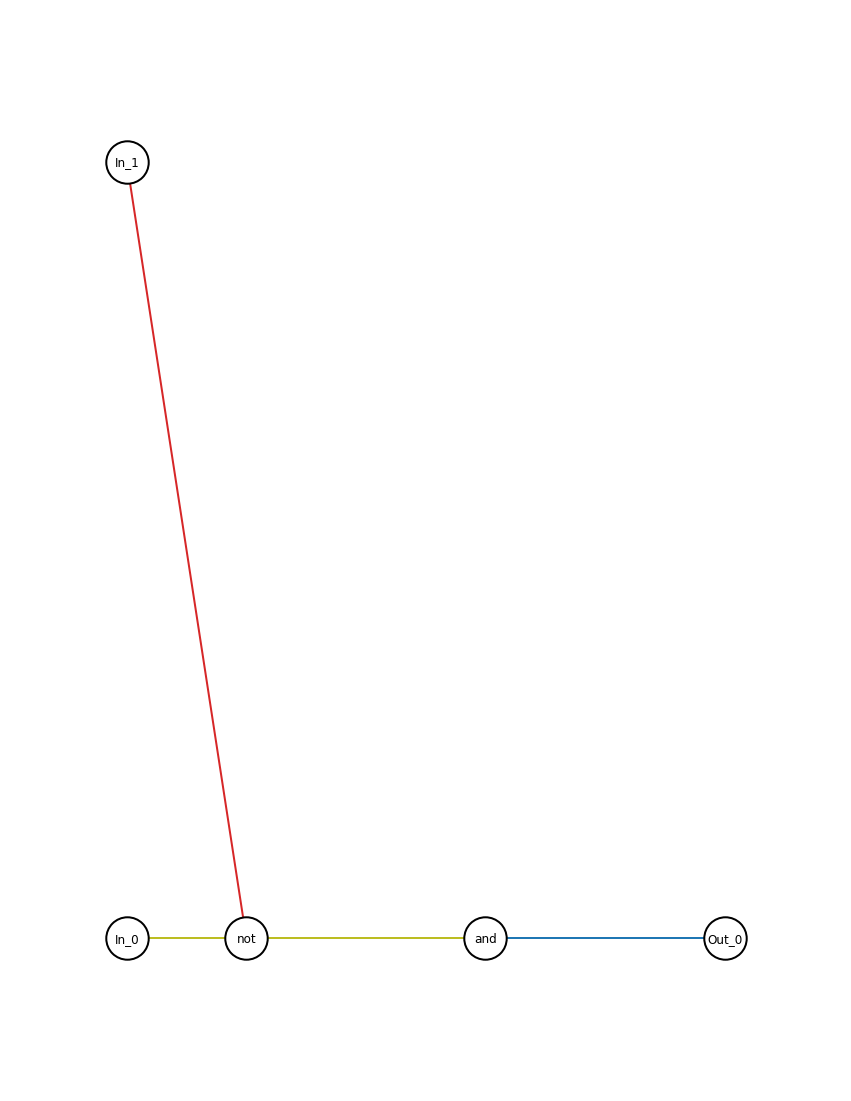

{353425: (5, 0), 353414: (3, 0), 353393: (1, 0), 353384: (0, 0), 353387: (0, 1)}


In [29]:
draw_graph (population.indvs[0], True)
population.save_pop("aaa.pkl")

In [26]:

start = time()
population.one_plus_lamda(20000, GEN_CHAMPIONS, FITNESS_GOAL, report = 100)
end = time()
print("Execution time: ", end - start)

generation  0 :  1000
generation  100 :  1000
generation  200 :  1000


KeyboardInterrupt: 

In [99]:
def scale_matrix(matrix, scale):
    return np.kron(matrix, np.ones((scale,scale)))

def animate_individual(individual, steps, scale, t):
    shape = TARGET_IMG.shape
    ca = CA_2D_model(shape[0], shape[1], individual.operate, 1 + EXTRA_LAYERS)

    canvas = Canvas(width=TARGET_IMG.shape[0]*scale, height=TARGET_IMG.shape[1]*scale)
    print(canvas)
    display(canvas)

    for i in range(steps):
        with hold_canvas(canvas):
            # Clear the old animation step
            canvas.clear()
            # Perfom all your drawings here
            img = scale_matrix(ca.remove_pad(), scale)
            _ = canvas.put_image_data(img, 0, 0)

            update = ca.update()
            if not update: # the automata got stable
                break

        # Animation frequency ~50Hz = 1./50. seconds
        sleep(t)

In [100]:

hof = population.get_best_indvs(16)
for ind in hof:
    print(ind.fitness)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [101]:
print(eval_individual(hof[0], TARGET_IMG, total_layers))
animate_individual(hof[0], 100, 10, 0.02)


1000
Canvas(height=150, width=150)


Canvas(height=150, width=150)

In [14]:
import networkx as nx
def draw_graph(gr, only_active = True):
    plt.rcParams["figure.figsize"] = (15,20)
    graph = nx.Graph()
    pos = {}
    labels = {}
    color_dict = {
        0: "tab:purple",
        1: "tab:red",
        3: "tab:olive",
        2: "tab:orange",
        4: "tab:green",
        5: "tab:blue",
    }

    col_num = len(gr.columns) - 1
    for col in reversed(gr.columns):
        row = 0
        for n_id in col:
            node = gr.nodes[n_id]
            if only_active and not node.active:
                continue
            pos[node.id] = (col_num, row)

            if col_num == 0:
                labels[node.id] = "In_" + str(row)
            elif col_num == len(gr.columns)-1:
                labels[node.id] = "Out_" + str(row)
            elif node.operation != None:
                labels[node.id] = node.operation.string
            
            graph.add_edge(node.id, node.id, color=color_dict[col_num%len(color_dict)])
            for input in node.inputs:
                graph.add_edge(input, node.id, color=color_dict[col_num%len(color_dict)])
    
            row += 1
        col_num -= 1
    
    options = {
        "font_size": 12,
        "node_size": 1800,
        "node_color": "white",
        "edgecolors": "black",
        "edge_color": nx.get_edge_attributes(graph,'color').values(),
        "linewidths": 2,
        "width": 2,
        "labels": labels,
        "pos": pos
    }
    nx.draw_networkx(graph, **options)
#     nx.draw_networkx(graph, pos)

    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()
    print(pos)


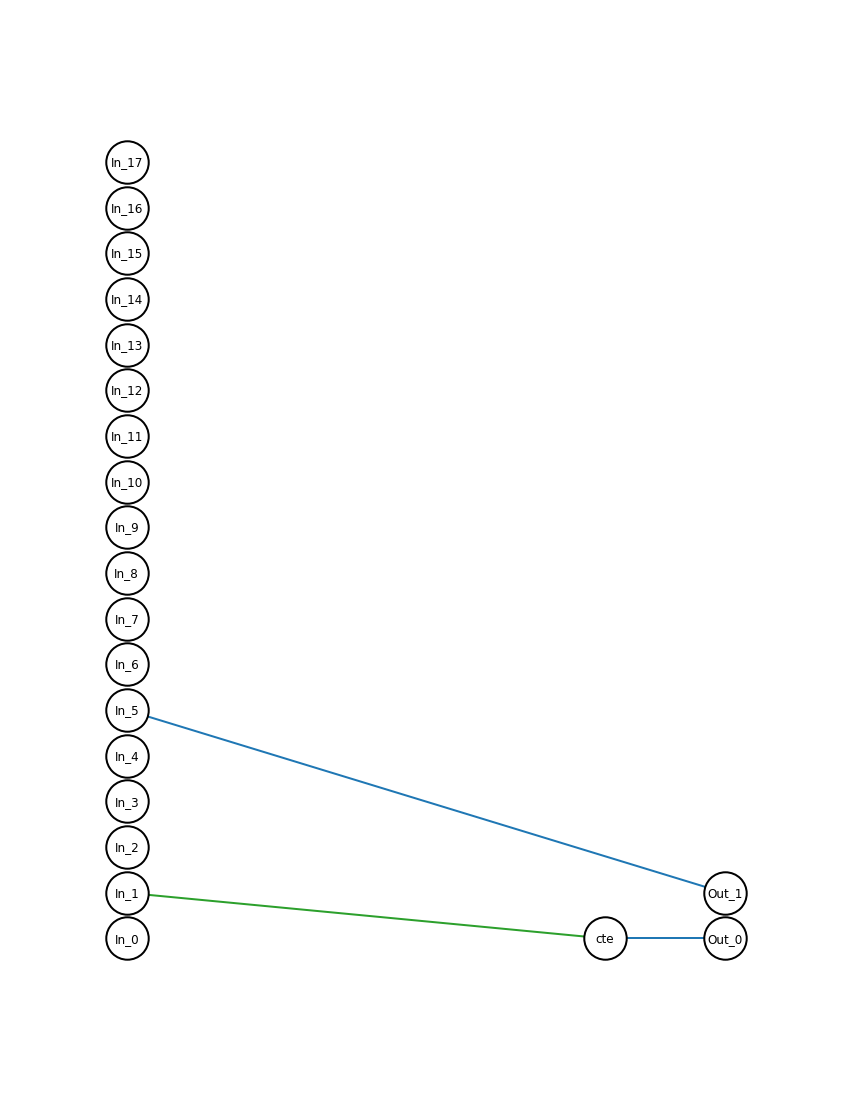

{56533150: (5, 0), 56533151: (5, 1), 56533143: (4, 0), 56533100: (0, 0), 56533101: (0, 1), 56533102: (0, 2), 56533103: (0, 3), 56533104: (0, 4), 56533105: (0, 5), 56533106: (0, 6), 56533107: (0, 7), 56533108: (0, 8), 56533109: (0, 9), 56533110: (0, 10), 56533111: (0, 11), 56533112: (0, 12), 56533113: (0, 13), 56533114: (0, 14), 56533115: (0, 15), 56533116: (0, 16), 56533117: (0, 17)}


In [104]:
import dill
draw_graph (hof[0])
population.save_pop("aaa.pkl")